In [1]:
import json
import numpy as np
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

/Users/ineschami/emoji/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
data_path = 'data/ActivityNet/activity_net.v1-3.min.json'
vid = json.load(open(data_path))['database']

In [3]:
durations = []
nb_prop = []
prop_durations = []

In [4]:
for i, vid_id in enumerate(vid.keys()):
    durations.append(vid[vid_id]['duration'])
    nb_prop.append(len(vid[vid_id]['annotations']))
    for p in vid[vid_id]['annotations']:
        prop_durations.append(p['segment'][1]-p['segment'][0])

In [5]:
nb_videos = len(durations)
nb_prop = np.array(nb_prop)
prop_durations = np.array(prop_durations)

In [6]:
print "Total number of videos: {}".format(nb_videos)
print "{}% of videos have no proposals".format(100.*np.sum(nb_prop==0)/nb_videos)
print "Average number of proposals per video (excluding videos with no proposals: {}".format(nb_prop[nb_prop!=0].mean())
print "Average video duration: {}".format(np.mean(durations))
print "Average proposal duration: {}".format(np.mean(prop_durations))

Total number of videos: 19994
25.2275682705% of videos have no proposals
Average number of proposals per video (excluding videos with no proposals: 1.54274247492
Average video duration: 116.704419376
Average proposal duration: 49.2139085214


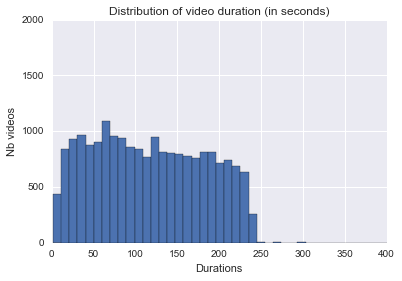

In [7]:
plt.hist(durations, bins=100)
plt.xlabel('Durations')
plt.ylabel('Nb videos')
plt.title('Distribution of video duration (in seconds)')
plt.axis([0, 400, 0, 2000])
plt.grid(True)
plt.show()

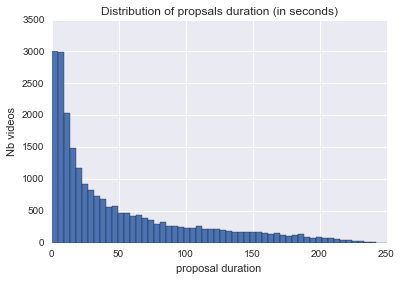

In [8]:
plt.hist(prop_durations, bins=100)
plt.xlabel('proposal duration')
plt.ylabel('Nb videos')
plt.title('Distribution of propsals duration (in seconds)')
plt.axis([0, 250, 0, 3500])
plt.grid(True)
plt.show()

In [9]:
def proportion_of_prop_captured(K, prop_durations, c3d_feats_length):
    max_length = K*c3d_feats_length
    return np.mean(prop_durations<=max_length)

In [10]:
print "Computing proportion of proposals captured for different values of K"
for K in [16, 64, 128, 256, 512]:
    print "K = {} : {}".format(K, proportion_of_prop_captured(K, prop_durations, 0.33))

Computing proportion of proposals captured for different values of K
K = 16 : 0.157865071106
K = 64 : 0.450572320499
K = 128 : 0.611949358307
K = 256 : 0.786203607353
K = 512 : 0.951135969476
